<h1><center>What Makes Your Android App Successful? </center></h1> 
<img src="store_image1.jpeg" alt="Drawing" style="width: 700px;"/>

**	-- An analysis by Justin Pan<br>
	-- published on  Dec 15th 2018
**

## 	Project Overview
	
Mobile applications have turned into an enormously profitable business, with
Global mobile app revenue forecast for 2020 around $189 billion.
These profits are not distributed equally amongst developers, with forty-seven percent of developers making less than one-hundred USD, more than half of which make nothing at all; creating a successful application is not easy. 

**Then, what does it take for an android app to be considered successful?**
	
First of all, what the word successful actually means? An Android application would be characterized as successful if it has an amount greater than a hundred thousand downloads. When the application is ready and uploaded on Play Store, advertisement is the primary factor for a successful application. 
	
**But, what should we take into account before you start develop android app?**<br>
In this Analysis, We will use data from [Kaggle dataset](https://www.kaggle.com/lava18/google-play-store-apps).  to do a analysis on why and how some applications succeed and others do not.
We will present you the interest findings with what factors could possible make your app more popular.

**Let us begin our data scientist journey!**


### Table of Contents

1. Getting Started
  - 1.1 Required Libraries
  - 1.2 Dataset Source
  - 1.3 Read and view Data
<br><br> 
2. Data Cleaning
  - 2.1 Cleaning Duplicate Data
  - 2.2 Processing Missing Value
  - 2.3 Data Type Converting
<br><br>  
3. 	Exploratory Data Analysis (EDA)
  - 3.1 Correlations Between Features
  - 3.2 Data Distribution
  - 3.3 Rating vs Installs
  - 3.4 Reviews vs Installs
  - 3.5 Size vs Installs
  - 3.6 Price vs Installs
  - 3.7 App name matters?
<br><br>  
4.  Predict Successful Apps with Machine Learning
  - 4.1 Splitting Data into Training and Test Sets
  - 4.2 Scikit-learn 4-Step Modeling Pattern
  - 4.3 Measuring Model Performance
<br><br>
5.  Conclusion
<br><br>
6. Reference

# 1. Getting Started

## 1.1 Required Libraries
- [NumPy](http://www.numpy.org/): the fundamental package for scientific computing with Python.
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/): used for data display and partitioning
- [Matplotlib](https://matplotlib.org/) - pyplot: used for plotting Pandas data into graphs and charts
- [Seaborn](https://seaborn.pydata.org/): provides a high-level interface for graphics on top of Matplotlib
- [scikit-learn](https://scikit-learn.org/stable/): very popular machine learning library
  - linear-model: used to calculate models for multiple linear regression
  - model_selection: used to split up dataset into test and training data and evaluate predictions
  - classification_report: used to print out the report for evaluation model.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## 1.2 Dataset Source

Google makes data available about its applications on http://play.google.com. These pages contain data
which can be extracted such as the name of the application, the description, the number of installations, the average rating of the application, and many more other features. 
Instead of scrapping directly from Google web site, We will use data from [Kaggle dataset](https://www.kaggle.com/lava18/google-play-store-apps).

**googleplaystore.csv**

Dataset Features:

1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropriate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App



## 1.3 Read and View Data

Load .csv file and display the head rows to get a sense of what is contained in the dataset.

In [2]:
# read play store data
play_data = pd.read_csv("googleplaystore.csv")
print('Display head rows for loaded dataset:')
play_data.head()


Display head rows for loaded dataset:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Data Cleaning


## 2.1 Cleaning Duplicate Data
we will remove duplicate App names.

In [3]:
# display duplicate App Name data
print('Checking duplicate rows with same App name:\n{}'\
      .format(play_data[play_data.duplicated(subset='App')].count()))

Checking duplicate rows with same App name:
App               1181
Category          1181
Rating            1170
Reviews           1181
Size              1181
Installs          1181
Type              1181
Price             1181
Content Rating    1181
Genres            1181
Last Updated      1181
Current Ver       1181
Android Ver       1181
dtype: int64


In [4]:
# remove duplicates App name in play store and display count for duplicate data again for confirmation
play_data = play_data.drop_duplicates(subset='App')
print('Checking duplicate rows after dropping dups:\n{}'\
       .format(play_data[play_data.duplicated(subset='App')].count()))

Checking duplicate rows after dropping dups:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [5]:
print('Dataset shape after remove duplicate apps:{}'.format(play_data.shape))

Dataset shape after remove duplicate apps:(9660, 13)


## 2.2 Processing Missing Value
We can use seaborn to create a simple heatmap to see where we are missing data!

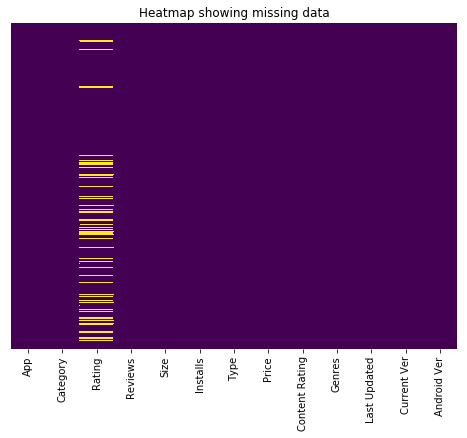

In [6]:
plt.figure(figsize=(8,6,))
sns.heatmap(play_data.isnull(), yticklabels = False,cbar = False, cmap = 'viridis')
plt.title('Heatmap showing missing data')
plt.show()

In [7]:
# check missing value for play store data
print('Missing values in play store data:\n{}'.format(play_data.isnull().sum()))

Missing values in play store data:
App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


From both heatmap and print out above, we know there are more missing values in **Rating** column.
But I rather keep this data for better analysis, and remove missing data for columns below:
* Type
* Content Rating
* Current Ver
* Android Ver

For missing data in **Rating**, we will fill with **Zero**.

In [8]:
# There are more missing values in Rating fields, 
# but I rather keep the data for better analysis. 
# I will drop missing data for other columns:
play_data.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])
print('Dataset Shape after cleaning missing Data: {}'.format(play_data.shape))


Dataset Shape after cleaning missing Data: (9648, 13)


In [9]:
# Process for missing Rating data by
# filling rating in missing areas by 0 (not captured)

play_data.Rating.fillna(0,inplace=True)
print('Checking missing values again in Google_play_store after fill Rating column with 0  \
:\n{}'.format(play_data.isnull().sum()))

Checking missing values again in Google_play_store after fill Rating column with 0  :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


## 2.3 Data Type Converting

In [10]:
# check column types:
print('Datatype in loaded dataset:\n{}'.format(play_data.dtypes))

Datatype in loaded dataset:
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


We found except **Rating** which is numeric, all column types are object which are not what we expected.
We will convert following column types to numeric for later analysis.
* Reviews
* Size
* Installs
* price

In [11]:
# Convert Review data to numeric
play_data['Reviews'] = pd.to_numeric(play_data['Reviews'],errors='coerce')


In [12]:
# Convert Size to numeric
print('Unique Values in Column \'Size\':\n{}'.format(play_data['Size'].unique()))

Unique Values in Column 'Size':
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M' '6.0M'
 '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M'
 '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M'
 '5.7M' '8.6M' '2.4M' '27M' '2.7M' '2.5M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M' '8.2M'
 '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M'
 '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M' '7.5M'
 '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M'
 '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k' '1.6M'
 '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M'
 '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M' '97M'
 '2.0M' '1.9M' '1.8M' '5.3M' 

Looking above output for unique values in **Size**, We found following patterns:
* The unit of the **Size** either in M or K, we need make replace them with numbers.
* **Varies with device** need to be converted number.
  We like to replace with average size in the same category.

In [13]:
# replace M with 10^6, K with 10^3
play_data['Size'].replace('Varies with device', np.nan, inplace = True ) 
play_data.Size = (play_data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             play_data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

# calculate average size within the same category
play_data['avg_size'] = play_data.groupby(['Category'],as_index=False)['Size'].transform('mean')

# fill in na with average size
play_data['Size'] = play_data['Size'].fillna(play_data['avg_size'])
print('Display head rows after converting to numeric for column \'Size\':\n')
play_data.head()

Display head rows after converting to numeric for column 'Size':



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,avg_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.252951e+07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.252951e+07
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.252951e+07
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.252951e+07
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.252951e+07


In [14]:
# convert Installs to numeric
print('Unique Values in Column \'Installs\':\n{}'.format(play_data['Installs'].unique()))

Unique Values in Column 'Installs':
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+']


We found "+" and "," were in column **Installs**, so we need to remove them in order to converting to numeric.

In [15]:
# remove + and ,
play_data['Installs'] = play_data['Installs'].str.replace(r'\D','').astype(float)

In [16]:
# convert Price column to numeric
print('Unique Values in Column \'Price\':\n{}'.format(play_data['Price'].unique()))

Unique Values in Column 'Price':
['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


Clearly, We need to remove '$' from **Price** column, so it can be converted to numeric value.

In [17]:
play_data['Price']=play_data['Price'].str.replace('$','').astype(float)

Now, our dataset is clean and ready to be used for further analysis.
Let us check again to confirm data type conversion is correct and 
if there are still missing data in the dataset using heatmap.

In [18]:
# check column types:
print('Datatype after converting:\n{}'.format(play_data.dtypes))

Datatype after converting:
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
avg_size          float64
dtype: object


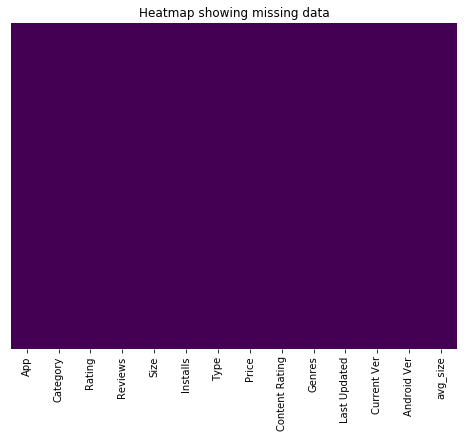

In [19]:
plt.figure(figsize=(8,6,))
sns.heatmap(play_data.isnull(), yticklabels=False,cbar = False, cmap='viridis')
plt.title('Heatmap showing missing data')
plt.show()

# 3. Exploratory Data Analysis (EDA)
Now, we have made our dataset clean, we will do further analysis using it.
Our goals is to predict the successful Apps. But what metrics can be used to determine 
if an App is successful?
The most obvious choice for a success metric would be revenue, however this information is among the small amount of information not available publicly. Instead, we use number of installations as a proxy for success.<br>
I will use an app with more than 100,000 downloads as measurement for a success app.
In this section, we will focus on the Installations and how other factors can affect them. 


## 3.1 Correlations  Between Features

Let us do a basic exploratory analysis using **seaborn heatmap** to look for correlations between features.

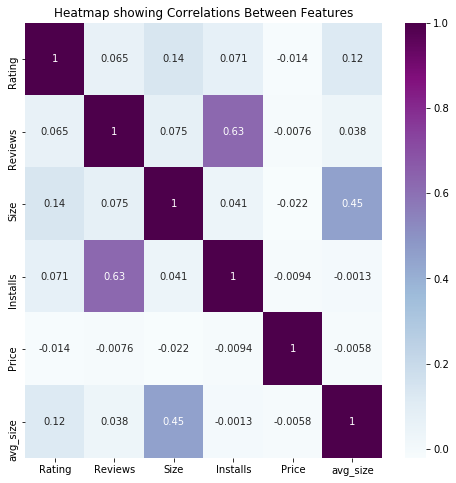

In [20]:
#plot heat map
plt.figure(figsize=(8,8))
sns.heatmap(play_data.corr(), annot = True, cmap = 'BuPu')
plt.title('Heatmap showing Correlations Between Features')
plt.show()

We also like to use a pairplot below with the hue defined by the **Type** feature.
This is the basic exploratory analysis to look for any evident patterns or relationships between the features.

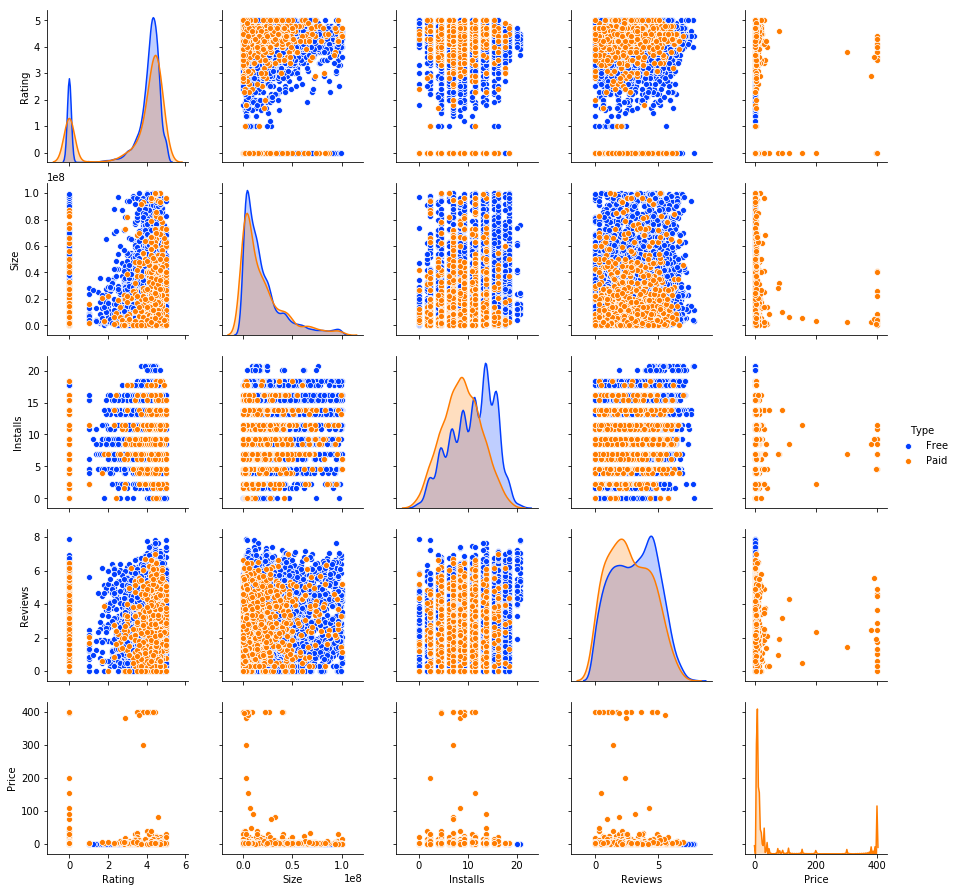

In [21]:
# pairplot
x = play_data['Rating']
y = play_data['Size']
z = play_data['Installs'][play_data.Installs!=0].dropna()
p = play_data['Reviews'][play_data.Reviews!=0].dropna()
t = play_data['Type']
price = play_data['Price']
p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
    columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), 
    hue='Type',palette="bright")

plt.show()

There's one noticeable strong relation between **Reviews** and **Installs** which could mean that people tend to download more reviewed apps than most rated apps.
Next We like to do more research about following relationships:
* Rating vs Installs
* Reviews vs Installs
* Size vs Installs
* Price vs Installs

## 3.2 Data distributions

First, let us find out how applications distributed in each category.

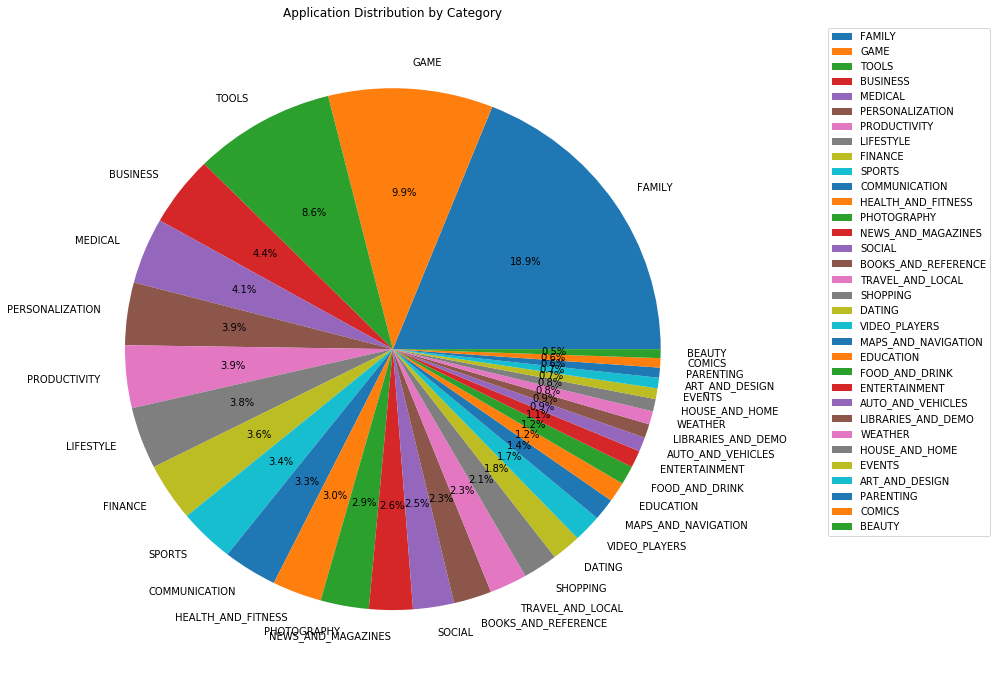

In [22]:
# plot pie chart for apps in each category
temp = play_data['Category'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels= temp['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.title('Application Distribution by Category')
plt.show()

We can see that **Family, Game and Tools** are the most popular categories in our dataset. So you know what kind of apps you want to develop in the future.
Let us check what happens with the **Installs** in each category?

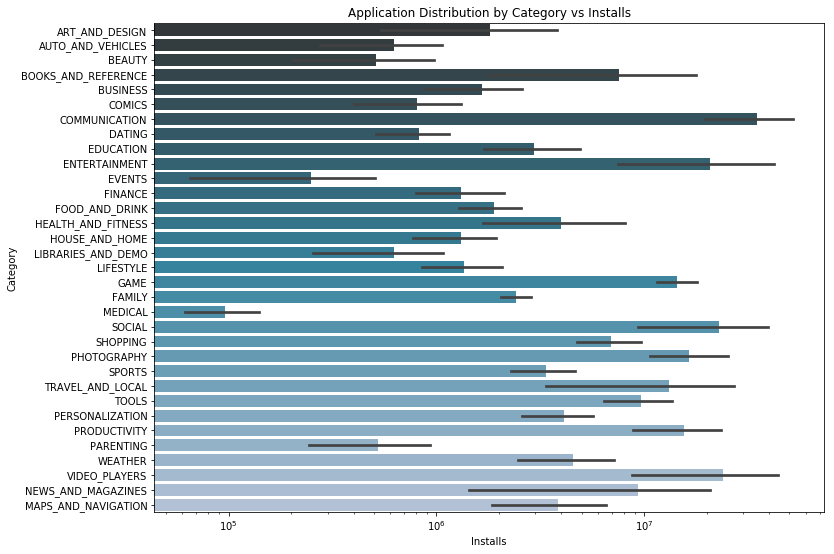

In [23]:
plt.figure(figsize=(12,9))
sns.barplot(y = play_data['Category'], x = play_data['Installs'], palette= 'PuBuGn_d')

plt.xscale('log')
plt.title('Application Distribution by Category vs Installs')
plt.show()

**The top downloaded categories:**
* Communications
* Entertainment
* Video Players
* Social

If we set the successful Installs as 100,000,  the categories which meet the criteria are:

In [24]:
l = play_data[play_data[['Installs']].mean(axis=1)>1e5]['Category'].unique()
for c in l:
    print(c)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


## 3.3 Rating vs Installs

Let us checking if Installs related to Rating:

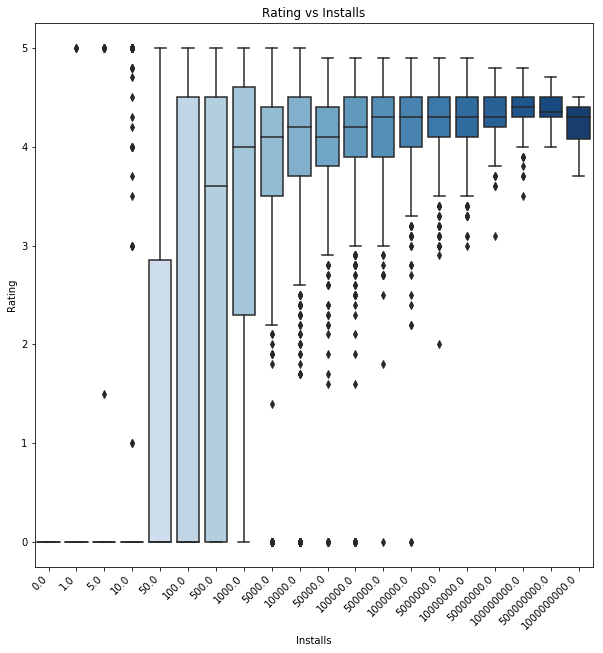

In [25]:
plt.figure(figsize=(10,10))
g = sns.boxplot(y = play_data['Rating'], x = play_data['Installs'],palette= 'Blues')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.title('Rating vs Installs')
plt.show()

It seems that there is less variation in **Rating** of apps with higher **Installs**.
You can also easily figure it out from scatter and line plot below.

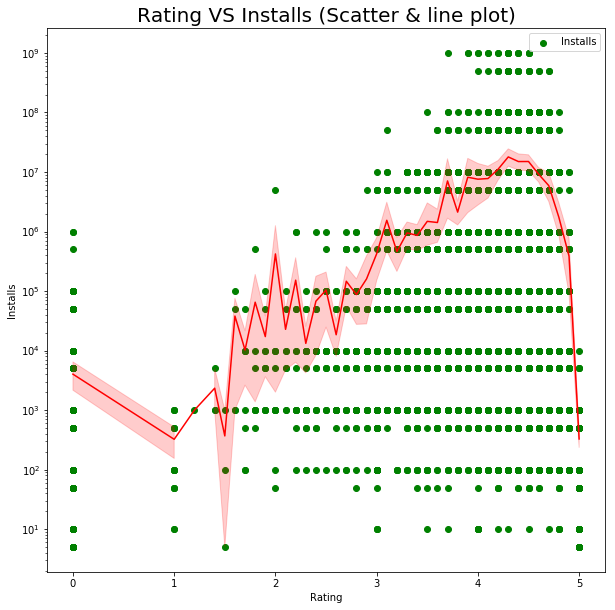

In [26]:
# anothe plot to look at
plt.figure(figsize=(10,10))
plt.scatter( x=play_data['Rating'], y=play_data['Installs'] , color = 'green')
g = sns.lineplot(x="Rating", y="Installs",color="red", data=play_data) 
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Rating VS Installs (Scatter & line plot)',size = 20)
plt.show()

It also approved there is no strong relationship between **Rating** and **Installs**.

## 3.4 Reviews vs Installs

Now, let us look into **Reviews**. From correlation heatmap, we know Installs has strong relationship with reviews.

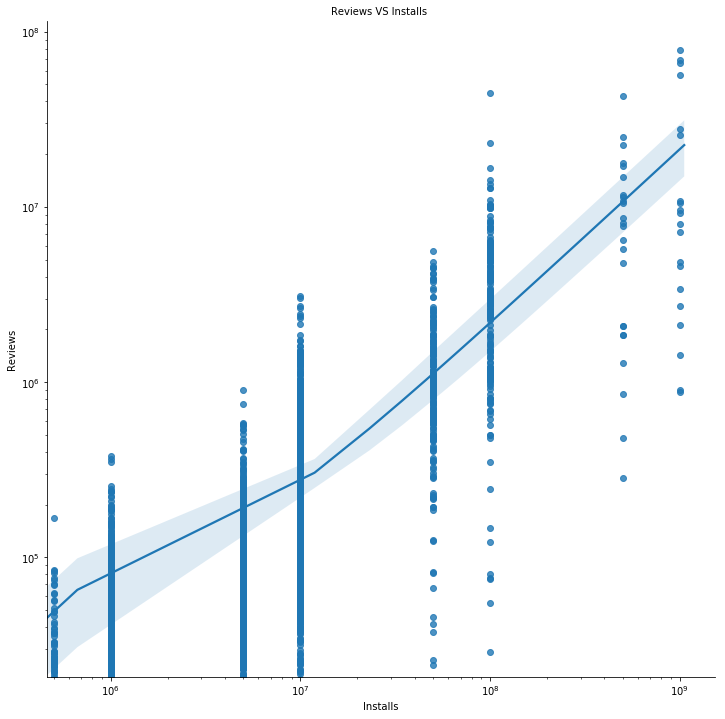

In [27]:
g = sns.lmplot(x="Installs",y="Reviews", data=play_data,size=(10))
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews VS Installs ',size = 10)
plt.show()

You can see from above plot, The **Reviews**, unlike **Rating**, describe the **Installs** in a linear way.
This means that customers tend to download a given app more if it has been reviewed by a larger number of people.
This also means that many active users who download an app usually also leave back a review or feedback.
So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

## 3.5 Size vs Installs

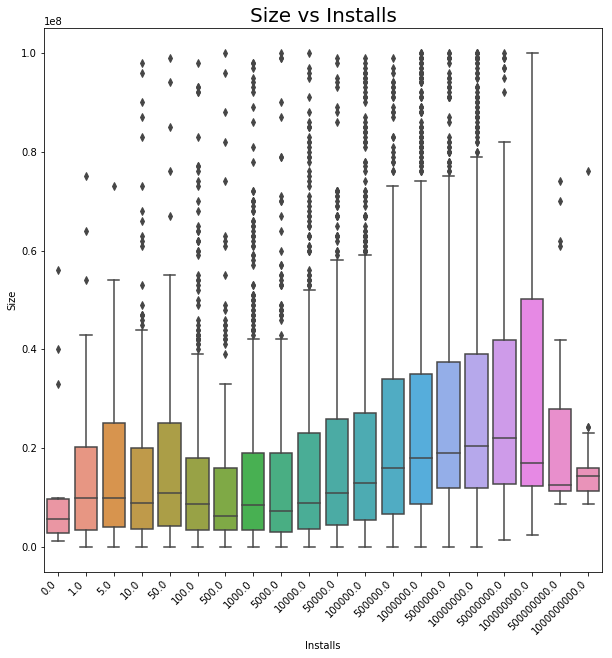

In [28]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="Installs", y="Size", data=play_data)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.title('Size vs Installs',size = 20)
plt.show()

The above plot showed that the **Size** increases as **Installs** increase.
After some research, I found the size increases as your app includes more graphic features, such as 3D models, animations, Music, Video etc.
Those extra features make your app appealing to users for download.


## 3.6 Price vs Installs

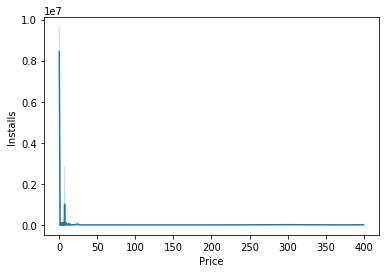

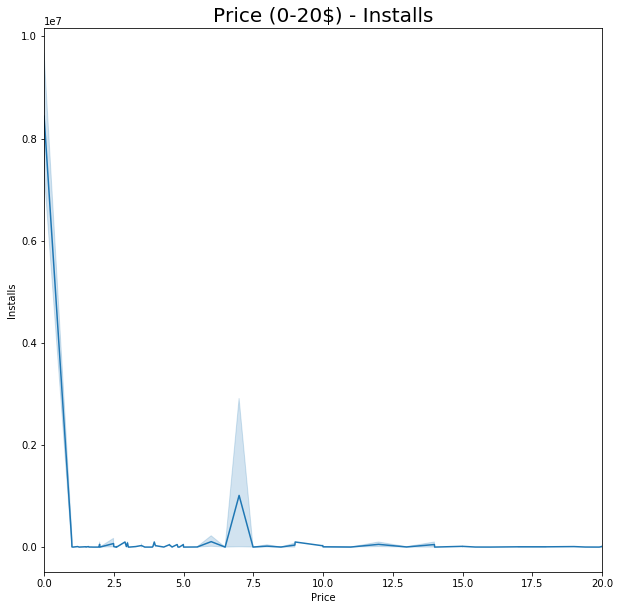

In [29]:
g = sns.lineplot(x="Price", y="Installs", data=play_data)

plt.figure(figsize=(10,10))
g = sns.lineplot(x="Price", y="Installs", data=play_data)
g.set(xlim=(0, 20))
plt.title('Price (0-20$) - Installs',size = 20)
plt.show()

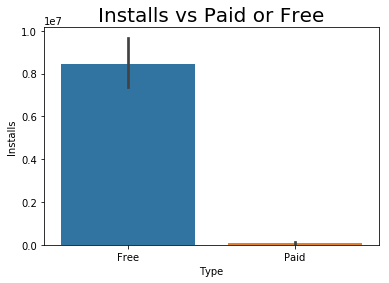

<Figure size 864x864 with 0 Axes>

In [30]:

g = sns.barplot(x="Type", y='Installs',data=play_data)
plt.title('Installs vs Paid or Free',size = 20)
plt.figure(figsize=(12,12))
plt.show()

As price increase, the number of Installs decreased. Paid apps have a relatively lower number of downloads than free apps. It is understandable.
So you know if you will develop app, start from free of charge.

## 3.7 App name matters?
Have you ever wondered if the name of the App plays an impact on its number of installations!!!
Let's feed our curiosity.

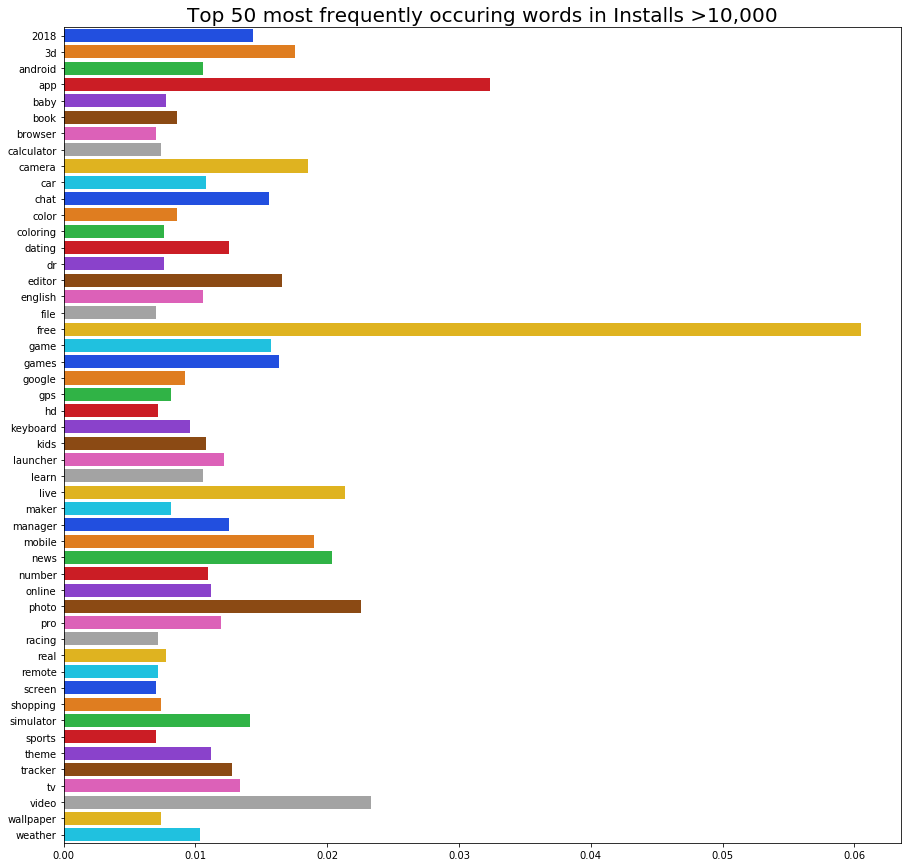

In [31]:
# get top 50 word in App names for success Installs
success_installs = play_data[(play_data['Installs'] >= 100000) ]['App']
#orpus=success_installs
vectorizer = CountVectorizer(max_features=50, stop_words='english')

X = vectorizer.fit_transform(success_installs)
names=vectorizer.get_feature_names()
values=X.toarray().mean(axis=0)

plt.figure(figsize=(15,15))
sns.barplot(x=values, y=names, palette="bright")
plt.title('Top 50 most frequently occuring words in Installs >10,000',size = 20)
plt.show()

You do need name your app better to make your app more popular!! 
Let us find out if the length of your App name matters?

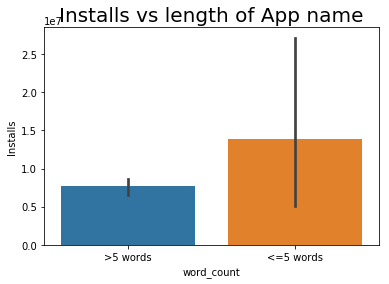

<Figure size 864x864 with 0 Axes>

In [32]:
play_data['word_count'] = np.where(play_data['App'].apply(len) >5, \
                                   '>5 words', '<=5 words')

g = sns.barplot(x="word_count", y='Installs',data=play_data)
plt.title('Installs vs length of App name',size = 20)
plt.figure(figsize=(12,12))
plt.show()

As our visualizations speak, it is better to have a small name for your app. Well, I personally prefer small but effective names.

# 4. Predict Successful Apps

We will use scikit-learn's 4 step modeling pattern and show the behavior of the logistic regression algorithm, then use it to predict success apps.<br>
** Define Success Metric:** Installs > 10^5 <br>
First, we need to add target logistic data column which is the result for success.

In [33]:
play_data['success_app'] = np.where(((play_data['Installs'] >= 100000)),1,0)

## 4.1 Splitting Data into Training and Test Sets

In [34]:
# train/test split
X = play_data[['Reviews', 'Rating','Size', 'Price']] # features
y = play_data['success_app'] # prediction data
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                test_size=0.33, random_state=42)

## 4.2 Scikit-learn 4-Step Modeling Pattern
* Step 1. Import the model
* Step 2. Make an instance of the Model
* Step 3. Training the model on the data, storing the information learned from the data.<br>
Model is learning the relationship between features(x_train) and labels (y_train)
* Step 4. Predict labels for new data

In [35]:
# 4 steps
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


## 4.3 Measuring Model Performance

We will use many ways to measure model performance, we will use below methods to evaluate our model performance:
* use accuracy as our metric. 
  we can Use score method to get accuracy of model
* Use classification report to get precision, recall, F1 Score, ROC Curve, etc)

In [36]:
score = logmodel.score(X_test, y_test)
print('accuracy: {}'.format(score))

accuracy: 0.8941582914572864


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89      1503
          1       0.91      0.88      0.90      1681

avg / total       0.89      0.89      0.89      3184



I get 89% accuracy. it is pretty good model, but we can add other features(e.g. non-numeric features) to our model to see if the accuracy can be increased in the future.

# 5. Conclusions

We have completed analyzing Google Play, the largest Android app store.
The overall objective of this analysis effort is to predict the successful Apps. 
We have determined to use an app with more than 100,000 downloads as measurement for a success app.

We have applied EDA process using Google play store data obtained from [Kaggle dataset](https://www.kaggle.com/lava18/google-play-store-apps). 
During the analysis, we have identified:
* Family, Game and Tools are the most popular Categories in our dataset.
* The top downloaded categories:
    * Communications
    * Entertainment
    * Video Players
    * Social
* no strong relationship between Rating and Installs.
* Strong correlation between Reviews and Installs.
* Size increases as Installs increase.
* App name does matters, name your app better name with proper length.

Moreover, by employing Scikit-learn 4-Step Modeling Pattern implement a Logistic Regression prediction model which has 89% accruacy rate.

As our future work, we are aiming for incorporating other features of applications, such as user reviews and analyze their correlation with already examined features(such as ratings) of the apps. Moreover, we aim to develop a recommendation system exploiting the identiﬁed correlation features to recommend applications 

# 6. Reference

* [Mining and analysis of apps in google play](https://www.researchgate.net/publication/290102532_Mining_and_analysis_of_apps_in_google_play)
* [https://www.kaggle.com/lava18/google-play-store-apps](https://www.kaggle.com/lava18/google-play-store-apps)
* 	[Analysis of Apps in the Google Play Store](https://nycdatascience.com/blog/student-works/web-scraping/analysis-of-apps-in-the-google-play-store/)

* [App Revenues (2017)](http://www.businessofapps.com/data/app-revenues/)
